In [151]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [152]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [153]:
df_artist = pd.read_csv('artists-moma.csv')
df_artworks = pd.read_csv('artworks-moma.csv')
df_moma = pd.read_csv('moma.csv')

In [154]:
df_artist.head(3)

Artist ID            Name Nationality Gender  Birth Year  Death Year
0          1  Robert Arneson    American   Male      1930.0      1992.0
1          2  Doroteo Arnaiz     Spanish   Male      1936.0         NaN
2          3     Bill Arnold    American   Male      1941.0         NaN

In [155]:
df_artworks.head(3)

Artwork ID                                              Title Artist ID  \
0           2  Ferdinandsbrücke Project, Vienna, Austria, Ele...      6210   
1           3  City of Music, National Superior Conservatory ...      7470   
2           4  Villa near Vienna Project, Outside Vienna, Aus...      7605   

                       Name  Date  \
0               Otto Wagner  1896   
1  Christian de Portzamparc  1987   
2                Emil Hoppe  1903   

                                              Medium  \
0      Ink and cut-and-pasted painted pages on paper   
1                  Paint and colored pencil on print   
2  Graphite, pen, color pencil, ink, and gouache ...   

                           Dimensions Acquisition Date  \
0  19 1/8 x 66 1/2" (48.6 x 168.9 cm)       1996-04-09   
1       16 x 11 3/4" (40.6 x 29.8 cm)       1995-01-17   
2   13 1/2 x 12 1/2" (34.3 x 31.8 cm)       1997-01-15   

                                              Credit Catalogue  \
0  Fractional and promised gift of Jo Carole and ...         Y   
1  Gift of the architect in honor of Lily Auchinc...         Y   
2             Gift of Jo Carole and Ronald S. Lauder         Y   

              Department Classification Object Number  Diameter (cm)  \
0  Architecture & Design   Architecture      885.1996            NaN   
1  Architecture & Design   Architecture        1.1995            NaN   
2  Architecture & Design   Architecture        1.1997            NaN   

   Circumference (cm)  Height (cm)  Length (cm)  Width (cm)  Depth (cm)  \
0                 NaN      48.6000          NaN    168.9000         NaN   
1                 NaN      40.6401          NaN     29.8451         NaN   
2                 NaN      34.3000          NaN     31.8000         NaN   

   Weight (kg)  Duration (s)  
0          NaN           NaN  
1          NaN           NaN  
2          NaN           NaN

In [156]:
df_moma.head(3)

id  ExNum                    ArtistName  SingleArtist  Year  \
0   0      1                    Peter Cook         False  2007   
1   1      1  Cristiano Toraldo di Francia         False  2007   
2   2      1                             x         False  2007   

                                               Title  \
0  OMA in Beijing: China Central Television Headq...   
1  OMA in Beijing: China Central Television Headq...   
2  OMA in Beijing: China Central Television Headq...   

                                            Location  \
0  \nMoMA, Floor 3, Exhibition Galleries\nThe Dor...   
1  \nMoMA, Floor 3, Exhibition Galleries\nThe Dor...   
2  \nMoMA, Floor 3, Exhibition Galleries\nThe Dor...   

                                               Blurb  
0  This exhibition presents one of the most innov...  
1  This exhibition presents one of the most innov...  
2  This exhibition presents one of the most innov...

In [157]:
# Convertir 'Artist ID' a texto en ambos dataframes
df_artworks["Artist ID"] = df_artworks["Artist ID"].astype(str)
df_artist["Artist ID"] = df_artist["Artist ID"].astype(str)

# Hacer el merge
df_moma_grande = df_artworks.merge(
    df_artist[["Artist ID", "Nationality", "Gender", "Birth Year", "Death Year"]],
    on="Artist ID",
    how="left")

In [158]:
df_moma_grande.sample(3)

Artwork ID                                              Title  \
42658       45345  George Davidson's Earth Measuring Apparatus, Y...   
55035       58127                                     Woman-Mandolin   
46161       48988                                  RIVER WALL RAJKOT   

      Artist ID                    Name     Date  \
42658      6260     Carleton E. Watkins     1881   
55035       745  Brassaï (Gyula Halász)  1934-35   
46161      8595    Unknown photographer     1899   

                                   Medium                         Dimensions  \
42658                           Cyanotype  8 5/16 x 11 7/8" (21.1 x 30.1 cm)   
55035  Gelatin silver print, printed 1967        9 3/8 x 7" (23.8 x 17.8 cm)   
46161                Albumen silver print   6 1/4 x 10 7/8" (15.9 x 27.8 cm)   

      Acquisition Date                  Credit Catalogue   Department  \
42658       1991-03-14  Gift of Paul F. Walter         Y  Photography   
55035       1968-11-06                Purchase         Y  Photography   
46161       1975-05-14                     NaN         N  Photography   

      Classification Object Number  Diameter (cm)  Circumference (cm)  \
42658     Photograph       63.1991            NaN                 NaN   
55035     Photograph   1409.1968.4            NaN                 NaN   
46161     Photograph   223.1975.23            NaN                 NaN   

       Height (cm)  Length (cm)  Width (cm)  Depth (cm)  Weight (kg)  \
42658         21.1          NaN        30.1         NaN          NaN   
55035         23.8          NaN        17.8         NaN          NaN   
46161         15.9          NaN        27.8         NaN          NaN   

       Duration (s) Nationality Gender  Birth Year  Death Year  
42658           NaN    American   Male      1829.0      1916.0  
55035           NaN      French   Male      1899.0      1984.0  
46161           NaN         NaN    NaN         NaN         NaN

In [159]:
columnas_a_eliminar = [
    "Artwork ID", "Artist ID", "Dimensions", "Credit", "Catalogue", "Object Number",
    "Diameter (cm)", "Circumference (cm)", "Height (cm)", "Length (cm)",
    "Width (cm)", "Depth (cm)", "Weight (kg)", "Duration (s)"]

df_moma_grande = df_moma_grande.drop(columns=columnas_a_eliminar)

In [160]:
df_moma_grande.head(3)

Title  \
0  Ferdinandsbrücke Project, Vienna, Austria, Ele...   
1  City of Music, National Superior Conservatory ...   
2  Villa near Vienna Project, Outside Vienna, Aus...   

                       Name  Date  \
0               Otto Wagner  1896   
1  Christian de Portzamparc  1987   
2                Emil Hoppe  1903   

                                              Medium Acquisition Date  \
0      Ink and cut-and-pasted painted pages on paper       1996-04-09   
1                  Paint and colored pencil on print       1995-01-17   
2  Graphite, pen, color pencil, ink, and gouache ...       1997-01-15   

              Department Classification Nationality Gender  Birth Year  \
0  Architecture & Design   Architecture    Austrian   Male      1841.0   
1  Architecture & Design   Architecture      French   Male      1944.0   
2  Architecture & Design   Architecture    Austrian   Male      1876.0   

   Death Year  
0      1918.0  
1         NaN  
2      1957.0

In [161]:
df_moma_grande.shape

(130262, 11)

In [162]:
df_moma_grande.columns

Index(['Title', 'Name', 'Date', 'Medium', 'Acquisition Date', 'Department',
       'Classification', 'Nationality', 'Gender', 'Birth Year', 'Death Year'],
      dtype='object')

In [163]:
df_moma.columns

Index(['id', 'ExNum', 'ArtistName', 'SingleArtist', 'Year', 'Title',
       'Location', 'Blurb'],
      dtype='object')

In [164]:
df_moma.shape

(10630, 8)

In [165]:
# Renombrar columna 'Name' en el grande para que coincida
df_moma_grande = df_moma_grande.rename(columns={"Name": "ArtistName"})

# Seleccionar solo las columnas que quiero añadir
columnas_a_unir = [
    "ArtistName", "Title", "Date", "Medium", "Acquisition Date", "Department", "Classification",
    "Nationality", "Gender", "Birth Year", "Death Year"]

df_limpio_subset = df_moma_grande[columnas_a_unir].drop_duplicates(subset="ArtistName")

# Merge limpio
df_moma_completo = df_moma.merge(df_limpio_subset, on="ArtistName", how="left")


In [166]:
df_moma_completo.head(3)

id  ExNum                    ArtistName  SingleArtist  Year  \
0   0      1                    Peter Cook         False  2007   
1   1      1  Cristiano Toraldo di Francia         False  2007   
2   2      1                             x         False  2007   

                                             Title_x  \
0  OMA in Beijing: China Central Television Headq...   
1  OMA in Beijing: China Central Television Headq...   
2  OMA in Beijing: China Central Television Headq...   

                                            Location  \
0  \nMoMA, Floor 3, Exhibition Galleries\nThe Dor...   
1  \nMoMA, Floor 3, Exhibition Galleries\nThe Dor...   
2  \nMoMA, Floor 3, Exhibition Galleries\nThe Dor...   

                                               Blurb  \
0  This exhibition presents one of the most innov...   
1  This exhibition presents one of the most innov...   
2  This exhibition presents one of the most innov...   

                                             Title_y  Date  \
0  Arcadia Peninsula Housing, project, Revised ve...  1979   
1                                                NaN   NaN   
2                                                NaN   NaN   

                     Medium Acquisition Date             Department  \
0  Ink and gouache on paper       1992-01-15  Architecture & Design   
1                       NaN              NaN                    NaN   
2                       NaN              NaN                    NaN   

  Classification Nationality Gender  Birth Year  Death Year  
0   Architecture     British   Male      1936.0         NaN  
1            NaN         NaN    NaN         NaN         NaN  
2            NaN         NaN    NaN         NaN         NaN

In [167]:
df_moma_completo.shape

(10630, 18)

In [168]:
df_moma_completo.columns

Index(['id', 'ExNum', 'ArtistName', 'SingleArtist', 'Year', 'Title_x',
       'Location', 'Blurb', 'Title_y', 'Date', 'Medium', 'Acquisition Date',
       'Department', 'Classification', 'Nationality', 'Gender', 'Birth Year',
       'Death Year'],
      dtype='object')

In [169]:
# Renombrar columna ArtistName a Artist
df_moma_completo = df_moma_completo.rename(columns={"ArtistName": "Artist", "Title_y":"Title"})

# Eliminar columnas
columnas_a_eliminar = ["id", "ExNum", "SingleArtist", "Location", "Blurb", "Title_x"]
df_moma_completo = df_moma_completo.drop(columns=columnas_a_eliminar)

# Reordenar columnas
columnas_finales = [
    "Artist", "Nationality", "Gender", "Birth Year", "Death Year",
    "Title", "Year", "Date", "Acquisition Date",
    "Medium","Department", "Classification"]
df_moma_final = df_moma_completo[columnas_finales]

In [170]:
df_moma_final.head(3)

Artist Nationality Gender  Birth Year  Death Year  \
0                    Peter Cook     British   Male      1936.0         NaN   
1  Cristiano Toraldo di Francia         NaN    NaN         NaN         NaN   
2                             x         NaN    NaN         NaN         NaN   

                                               Title  Year  Date  \
0  Arcadia Peninsula Housing, project, Revised ve...  2007  1979   
1                                                NaN  2007   NaN   
2                                                NaN  2007   NaN   

  Acquisition Date                    Medium             Department  \
0       1992-01-15  Ink and gouache on paper  Architecture & Design   
1              NaN                       NaN                    NaN   
2              NaN                       NaN                    NaN   

  Classification  
0   Architecture  
1            NaN  
2            NaN

In [171]:
# Función para aplicar un EDA básico
def eda_basico(df):
    print("========== RESUMEN GENERAL ==========")
    print("📐 Dimensiones:")
    print(F"Este DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas." , "\n")
    print()
    print()
    print('-----------------------------------------------------')
    print("🧠 Información general:")
    display(df.info())
    print()
    print()
    print('-----------------------------------------------------')
    print("📊 Tipos de datos por columna:")
    print(df.dtypes, "\n")
    print()
    print()
    print('-----------------------------------------------------')
    
    print("\n========== DESCRIBES ==========")
    print("📉 Descripción de columnas numéricas:")
    display(df.describe().T)
    print()
    print()
    print('-----------------------------------------------------')

    print("🔤 Descripción de columnas categóricas:")
    try:
        display(df.describe(include=['O']).T)
    except ValueError:
        print("No se existen columnas categóricas en este DataFrame.")
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== MUESTRAS ==========")
    print("🔍 Cinco filas aleatorias del DataFrame:")
    display(df.sample(5))
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== VALUE COUNTS (por columna categórica) ==========")
    col_categoricas =  df.select_dtypes(include=["object", "category"]).columns.tolist()

    if col_categoricas:
        for c in col_categoricas:
            print(f"\n--- {c} ---")
            print(df[c].value_counts)
    else:
        print("No se puede realizar la función .value_counts ya que no existen columnas categóricas.")
    print('-----------------------------------------------------')

    print("\n========== NULOS ==========")
    print("🚫 Valores nulos por columna:")
    if df.isnull().sum().any():
        print("Estas son las columnas en las que hay valores nulos:")
        print(display(df.isnull().sum()))
    else:
        print("No hay valores nulos en este DataFrame.")
    print()
    print()
    print('-----------------------------------------------------')

    print("\n========== DUPLICADOS ==========")
    print("📎 Filas duplicadas:")
    dup_count = df.duplicated().sum()
    print(f"Hay {dup_count} filas duplicadas.")
    if dup_count > 0:
        print("Ejemplo de duplicados:")
        print(df[df.duplicated()].head(), "\n")
    else:
        print("No hay filas duplicadas.\n")
    print('-----------------------------------------------------')

    print("\n========== HISTOGRAMAS NUMÉRICOS ==========")
    df.hist(bins=20, figsize=(25,25))
    plt.show()
    print('-----------------------------------------------------')

========== RESUMEN GENERAL ==========
📐 Dimensiones:
Este DataFrame tiene 10630 filas y 12 columnas. 



-----------------------------------------------------
🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10630 entries, 0 to 10629
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            10630 non-null  object 
 1   Year              10630 non-null  object 
 2   Title             7012 non-null   object 
 3   Date              7001 non-null   object 
 4   Medium            6784 non-null   object 
 5   Acquisition Date  6815 non-null   object 
 6   Department        7013 non-null   object 
 7   Classification    7013 non-null   object 
 8   Nationality       6944 non-null   object 
 9   Gender            6836 non-null   object 
 10  Birth Year        6874 non-null   float64
 11  Death Year        4018 non-null   float64
dtypes: float64(2), object(10)
memory usage: 996.7+

None



-----------------------------------------------------
📊 Tipos de datos por columna:
Artist               object
Year                 object
Title                object
Date                 object
Medium               object
Acquisition Date     object
Department           object
Classification       object
Nationality          object
Gender               object
Birth Year          float64
Death Year          float64
dtype: object 



-----------------------------------------------------

========== DESCRIBES ==========
📉 Descripción de columnas numéricas:


count         mean        std     min     25%     50%     75%  \
Birth Year  6874.0  1918.019348  32.169149  1798.0  1895.0  1923.0  1941.0   
Death Year  4018.0  1973.096317  28.632694  1863.0  1956.0  1976.0  1994.0   

               max  
Birth Year  2010.0  
Death Year  2016.0



-----------------------------------------------------
🔤 Descripción de columnas categóricas:


count unique                         top  freq
Artist            10630   5000             Jean (Hans) Arp   100
Year              10630     94                        2007   791
Title              7012   1999                    Untitled   294
Date               7001    579                        1968   197
Medium             6784   1036                  Lithograph   625
Acquisition Date   6815    753                  1952-05-20   175
Department         7013      8  Prints & Illustrated Books  2312
Classification     7013     21            Illustrated Book  1482
Nationality        6944     70                    American  3657
Gender             6836      2                        Male  5648



-----------------------------------------------------

========== MUESTRAS ==========
🔍 Cinco filas aleatorias del DataFrame:


Artist  Year  \
4457                           Douglas Huebler  1978   
1661                             John Armleder  2008   
4553                           Laurie Anderson  1977   
3871  Le Corbusier (Charles-Édouard Jeanneret)  1935   
892                 The Atlas Group/Walid Raad  2008   

                                                  Title  Date  \
4457               25 plates from Untitled (Xerox Book)  1968   
1661                   Untitled (for Parkett no. 50/51)  1997   
4553                      Hearring (for Parkett no. 49)  1997   
3871  Urban projects for Montevideo and São Paulo, B...  1929   
892                                                 NaN   NaN   

                                                Medium Acquisition Date  \
4457                                Offset lithographs       1969-02-10   
1661  Multiple of Perspex object in flourescent orange       1998-03-05   
4553       Multiple of earring with playable recording       1998-03-05   
3871                                      Ink on paper       1985-11-18   
892                                                NaN              NaN   

                      Department    Classification Nationality  Gender  \
4457  Prints & Illustrated Books  Illustrated Book    American    Male   
1661  Prints & Illustrated Books          Multiple       Swiss    Male   
4553  Prints & Illustrated Books          Multiple    American  Female   
3871       Architecture & Design      Architecture      French    Male   
892                          NaN               NaN         NaN     NaN   

      Birth Year  Death Year  
4457      1924.0      1997.0  
1661      1948.0         NaN  
4553      1947.0         NaN  
3871      1887.0      1965.0  
892          NaN         NaN



-----------------------------------------------------

========== VALUE COUNTS (por columna categórica) ==========

--- Artist ---
<bound method IndexOpsMixin.value_counts of 0                                               Peter Cook
1                             Cristiano Toraldo di Francia
2                                                        x
3                                    R. Buckminster Fuller
4                                           Gustav Klutsis
5                                             Brice Marden
6                                            Jonathan Monk
7                                           Barbara Probst
8                                          Jules Spinatsch
9                                                    Arman
10                                           John Armleder
11                                       Atelier Populaire
12                                            Fiona Banner
13                                          Georg Baseli

Artist                 0
Year                   0
Title               3618
Date                3629
Medium              3846
Acquisition Date    3815
Department          3617
Classification      3617
Nationality         3686
Gender              3794
Birth Year          3756
Death Year          6612
dtype: int64

None


-----------------------------------------------------

========== DUPLICADOS ==========
📎 Filas duplicadas:
Hay 1438 filas duplicadas.
Ejemplo de duplicados:
                          Artist  Year  \
41                    Peter Cook  2007   
42  Cristiano Toraldo di Francia  2007   
44         R. Buckminster Fuller  2007   
45                Gustav Klutsis  2007   
46                    Peter Cook  2007   

                                                Title  Date  \
41  Arcadia Peninsula Housing, project, Revised ve...  1979   
42                                                NaN   NaN   
44  Dymaxion Dwelling Machine, Wichita House, proj...  1945   
45                        Anti-Imperialist Exhibition  1931   
46  Arcadia Peninsula Housing, project, Revised ve...  1979   

                      Medium Acquisition Date             Department  \
41  Ink and gouache on paper       1992-01-15  Architecture & Design   
42                       NaN              NaN              

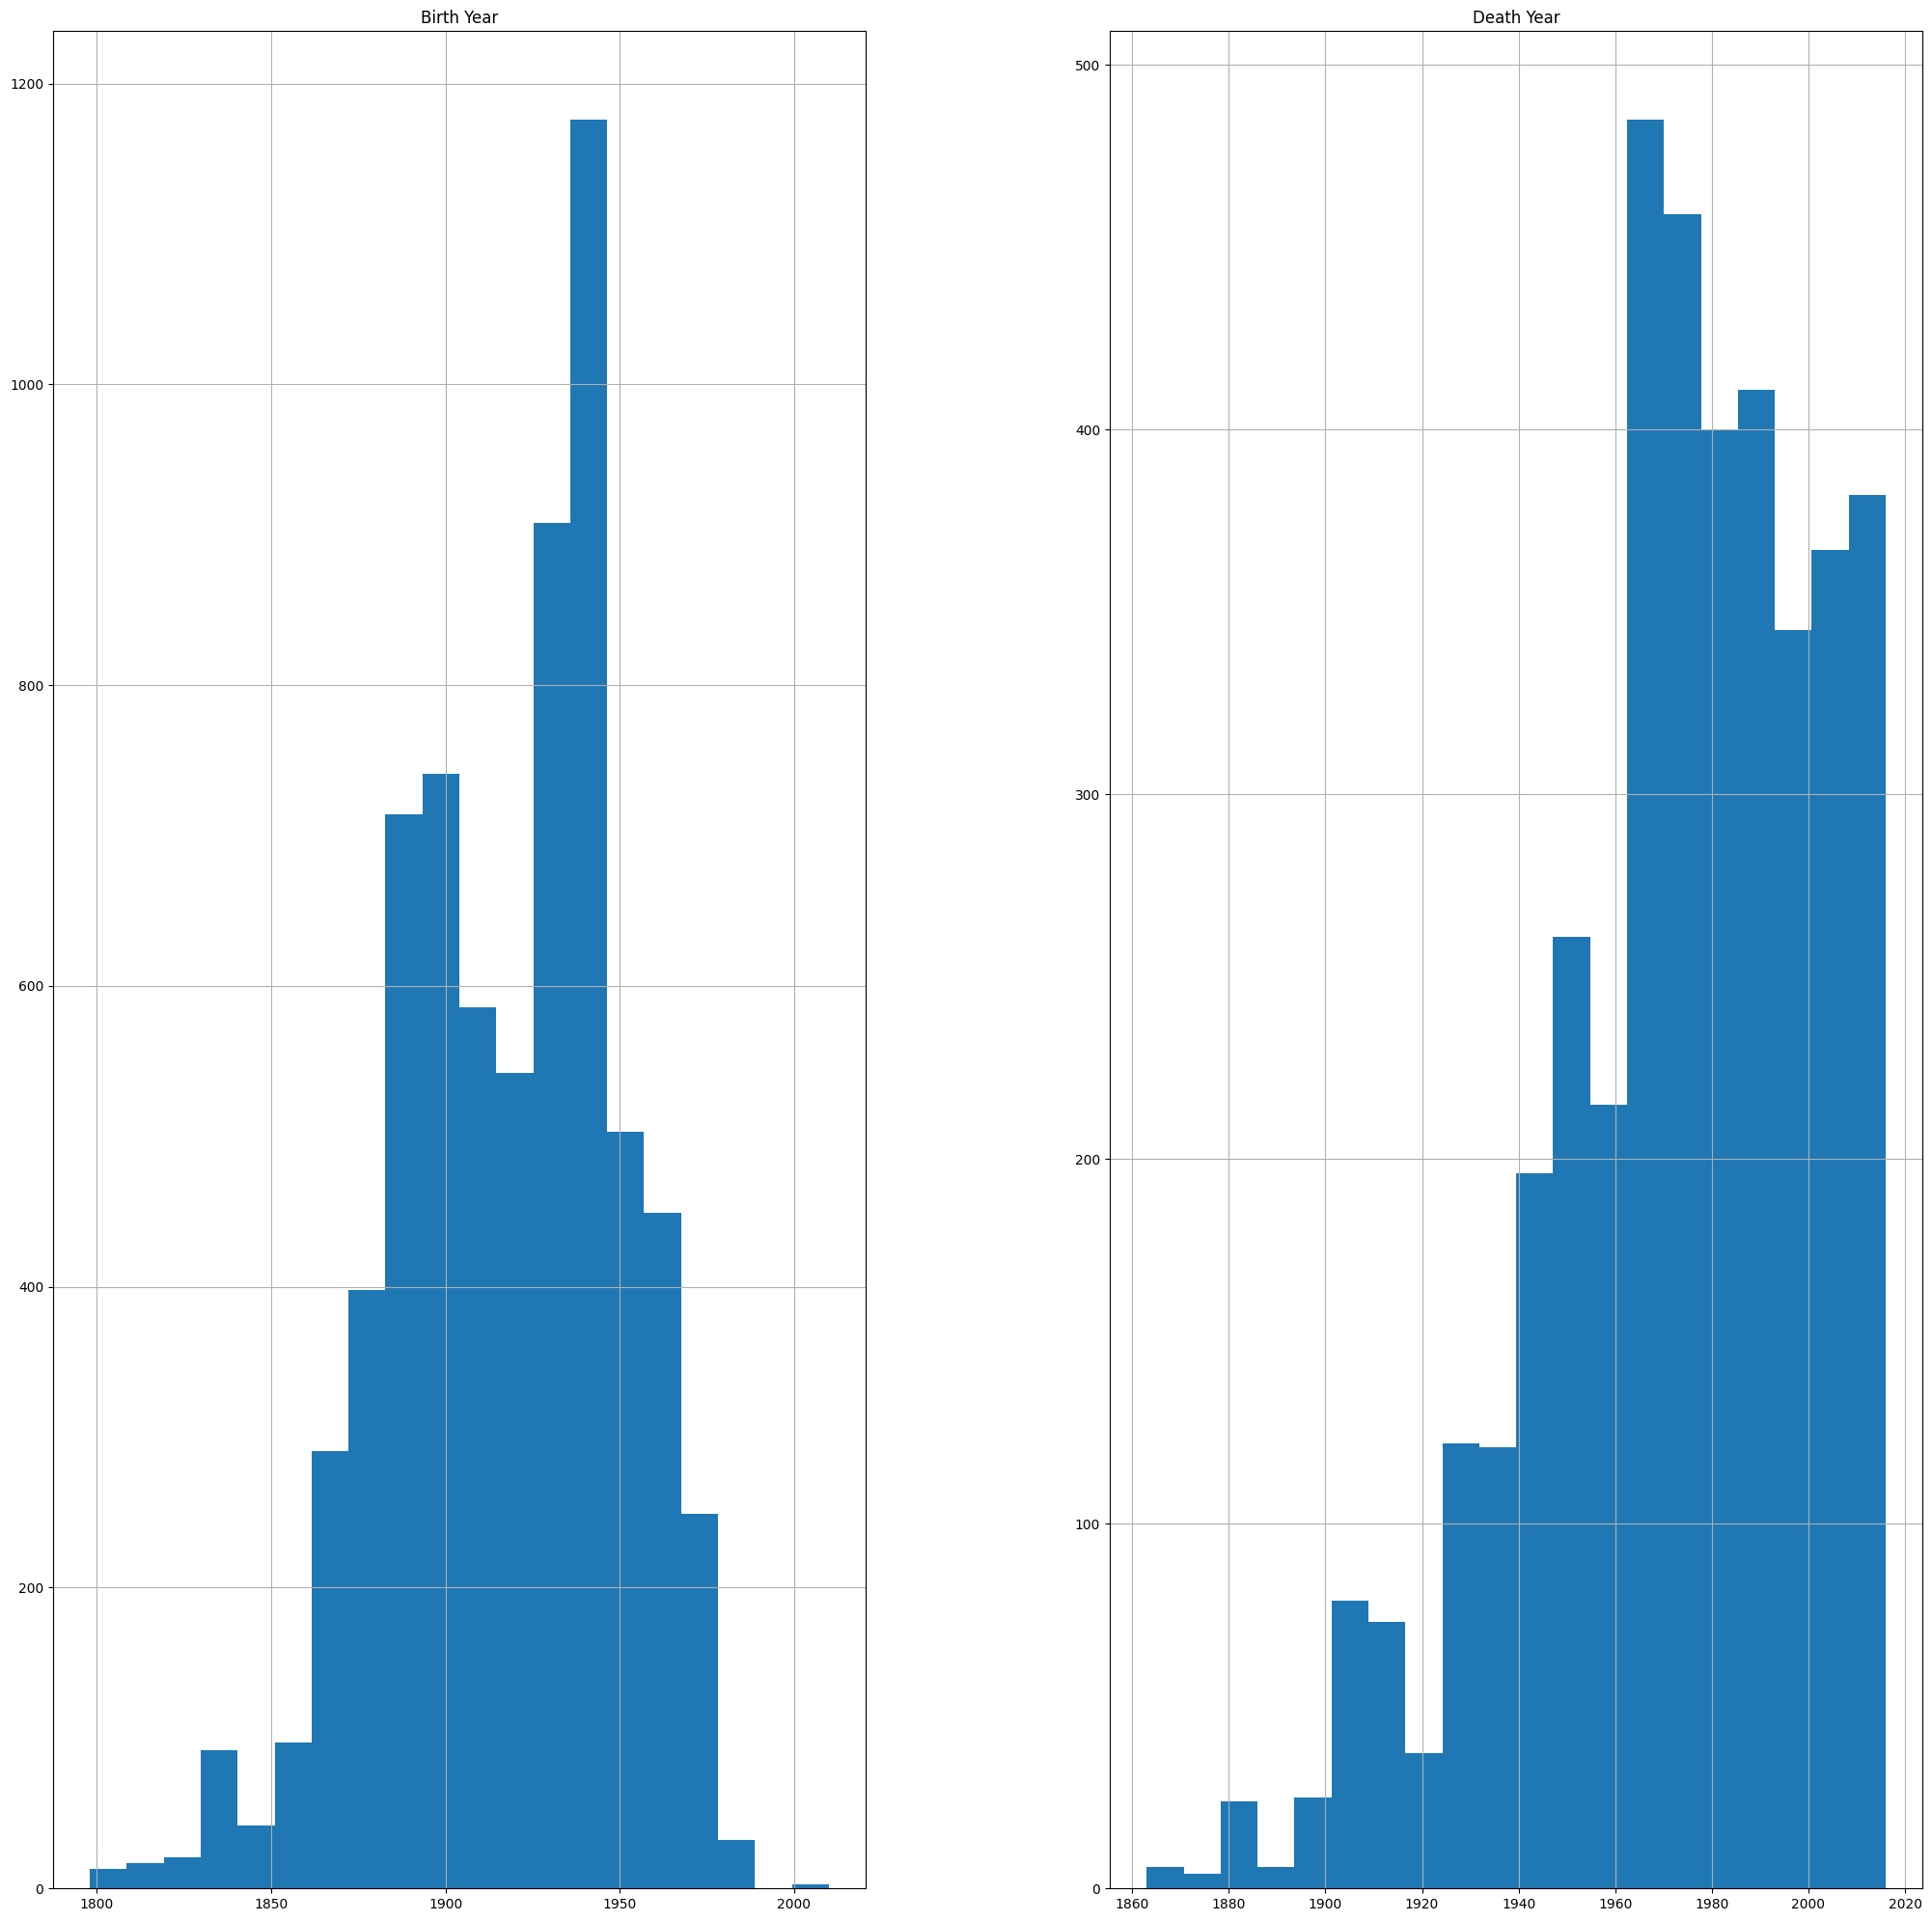

-----------------------------------------------------


In [172]:
eda_basico(df_moma_completo)

## CAMBIO DE TIPO DE VALORES

In [173]:
def limpiar_columnas_años(df):
    # Convertir 'Year' desde object a Int64, manejando strings no numéricos
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
    # Convertir años de nacimiento y muerte a enteros con soporte para nulos
    df['Birth Year'] = df['Birth Year'].astype('Int64')
    df['Death Year'] = df['Death Year'].astype('Int64')
    return df

In [174]:
limpiar_columnas_años(df_moma_completo)
df_moma_completo.dtypes

Artist              object
Year                 Int64
Title               object
Date                object
Medium              object
Acquisition Date    object
Department          object
Classification      object
Nationality         object
Gender              object
Birth Year           Int64
Death Year           Int64
dtype: object

## DUPLICADOS

In [175]:
# Contamos el número de duplicados en total
print(f"Tienes {df_moma_completo.duplicated().sum()} filas duplicadas.")

Tienes 1438 filas duplicadas.


In [176]:
# Vamos a comprobar si es que un artista y una misma obra y año se repiten más de 1 vez
df_moma_completo.groupby(['Artist', 'Title', 'Year']).size().reset_index(name='count').query('count > 1').head(10)

Artist                                              Title  \
43            Aernout Mik                                         Schoolyard   
61       Ahron Ben-Shmuel                                       Seated Woman   
75        Airstream, Inc.                     Airstream Bambi Travel Trailer   
85                Al Held  In-text plate (folios 19 verso and 20 recto) f...   
135  Aleksandr Archipenko  Plate 2 from FUTURISTI, ASTRATTISTI, DADAISTI,...   
144  Aleksandr Archipenko  Plate 2 from FUTURISTI, ASTRATTISTI, DADAISTI,...   
146  Aleksandr Archipenko  Plate 2 from FUTURISTI, ASTRATTISTI, DADAISTI,...   
147  Aleksandr Archipenko  Plate 2 from FUTURISTI, ASTRATTISTI, DADAISTI,...   
159   Alexander Bogomazov                                              Woman   
166      Alexander Calder            Gouaches Totems, Galerie Maeght, Calder   

     Year  count  
43   2009      3  
61   1941      3  
75   2007      3  
85   2002      2  
135  1953      2  
144  1979      2  
146  1986      2  
147  1989      2  
159  1979      2  
166  1942      2

In [177]:
# En este caso, borramos
df_moma_completo = df_moma_completo.drop_duplicates()

In [178]:
df_moma_completo.shape

(9192, 12)

## NULOS

In [179]:
# Calculamos porcentaje
porcentaje_nulos = (df_moma_completo.isnull().sum() / df_moma_completo.shape[0]) * 100

# Añadimos el total del sumatorio de nulos
total_nulos = df_moma_completo.isnull().sum()

# Convertimos la serie en un DataFrame con una columna llamada "Porcentaje nulos" 
df_nulos = pd.DataFrame({
    "Total nulos": total_nulos,
    "Porcentaje nulos": porcentaje_nulos,
    "Tipo de dato": df_moma_completo.dtypes})

# Añadimos el tipo de dato de cada columna
df_nulos["Tipo de dato"] = df_moma_completo.dtypes

# Filtramos solo las columnas que tienen al menos un nulo (> 0%), redondeamos, ordenamos y ponemos reset_index() para que nos salga en formato DataFrame
df_nulos = df_nulos[df_nulos["Porcentaje nulos"] > 0].round(2).reset_index().sort_values(by="Porcentaje nulos", ascending=False)

# Renombramos las columnas para que el resultado sea claro
df_nulos.columns = ["Columna", "Total nulos", "Porcentaje nulos", "Tipo de dato"]

# Llamamos al DataFrame para comprobar
df_nulos

Columna  Total nulos  Porcentaje nulos Tipo de dato
10        Death Year         5735             62.39        Int64
3             Medium         3575             38.89       object
4   Acquisition Date         3550             38.62       object
8             Gender         3547             38.59       object
9         Birth Year         3509             38.17        Int64
7        Nationality         3448             37.51       object
2               Date         3398             36.97       object
1              Title         3387             36.85       object
6     Classification         3386             36.84       object
5         Department         3386             36.84       object
0               Year           15              0.16        Int64

In [180]:
def imputar_numericos(df):
    num_cols = df.select_dtypes(include=np.number).columns

    # Calcular % de nulos por columna
    pct_nulls = (df[num_cols].isnull().sum() / len(df)) * 100

    for col in num_cols:
        porcentaje = pct_nulls[col]

        # Sin nulos
        if porcentaje == 0:
            print(f"{col}: sin valores nulos.")
            print("---------------------------------------------------------")
            continue

        # Con nulos
        else:
            print(f"{col}:⚠️ REQUIERE REVISIÓN. Hay un {col}: {porcentaje:.2f}% de nulos. Se recomienda revisar esta columna para decidir su posible imputación.")
            print("---------------------------------------------------------")
    return

def imputar_categoricas(df):
    # Detectar columnas categóricas
    cat_cols = df.select_dtypes(include='object').columns

    for col in cat_cols:
        nulos = df[col].isnull().sum()
        total = len(df)
        porcentaje_nulos = nulos / total

        # Sin nulos
        if porcentaje_nulos == 0:
            print(f"{col}: sin valores nulos.")
            continue

        # Más del 20% → imputar con "Unknown"
        if porcentaje_nulos > 0.20:
            df[col] = df[col].fillna("Unknown")
            print(f"{col}: imputada con 'Unknown'")
        else:
            # Menos del 20% → decidir entre moda o "Unknown"
            valores = df[col].value_counts(dropna=True)
            if len(valores) > 0:
                primero = valores.iloc[0]
                proporcion = primero / total
                if proporcion > 0.50:
                    moda = df[col].mode()[0]
                    df[col] = df[col].fillna(moda)
                    print(f"{col}: imputada con la moda '{moda}'")
                else:
                    df[col] = df[col].fillna("Unknown")
                    print(f"{col}: imputada con 'Unknown'")
            else:
                print(f"{col}: no se pudo imputar")
    return

In [181]:
imputar_numericos(df_moma_completo)

Year:⚠️ REQUIERE REVISIÓN. Hay un Year: 0.16% de nulos. Se recomienda revisar esta columna para decidir su posible imputación.
---------------------------------------------------------
Birth Year:⚠️ REQUIERE REVISIÓN. Hay un Birth Year: 38.17% de nulos. Se recomienda revisar esta columna para decidir su posible imputación.
---------------------------------------------------------
Death Year:⚠️ REQUIERE REVISIÓN. Hay un Death Year: 62.39% de nulos. Se recomienda revisar esta columna para decidir su posible imputación.
---------------------------------------------------------


Se decide no imputar estos nulos, ya que queremos ser lo más rigurosas posibles con los datos. Más adelante en los Dashboards se marcará como "Unknown", o no se mostrarán.

In [182]:
imputar_categoricas(df_moma_completo)

Artist: sin valores nulos.
Title: imputada con 'Unknown'
Date: imputada con 'Unknown'
Medium: imputada con 'Unknown'
Acquisition Date: imputada con 'Unknown'
Department: imputada con 'Unknown'
Classification: imputada con 'Unknown'
Nationality: imputada con 'Unknown'
Gender: imputada con 'Unknown'


========== RESUMEN GENERAL ==========
📐 Dimensiones:
Este DataFrame tiene 9192 filas y 12 columnas. 



-----------------------------------------------------
🧠 Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 9192 entries, 0 to 10629
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Artist            9192 non-null   object
 1   Year              9177 non-null   Int64 
 2   Title             9192 non-null   object
 3   Date              9192 non-null   object
 4   Medium            9192 non-null   object
 5   Acquisition Date  9192 non-null   object
 6   Department        9192 non-null   object
 7   Classification    9192 non-null   object
 8   Nationality       9192 non-null   object
 9   Gender            9192 non-null   object
 10  Birth Year        5683 non-null   Int64 
 11  Death Year        3457 non-null   Int64 
dtypes: Int64(3), object(9)
memory usage: 960.5+ KB


None



-----------------------------------------------------
📊 Tipos de datos por columna:
Artist              object
Year                 Int64
Title               object
Date                object
Medium              object
Acquisition Date    object
Department          object
Classification      object
Nationality         object
Gender              object
Birth Year           Int64
Death Year           Int64
dtype: object 



-----------------------------------------------------

========== DESCRIBES ==========
📉 Descripción de columnas numéricas:


count         mean        std     min     25%     50%     75%  \
Year        9177.0  1981.423014  22.844901  1929.0  1967.0  1983.0  2000.0   
Birth Year  5683.0   1916.76069  32.072012  1798.0  1893.0  1923.0  1941.0   
Death Year  3457.0  1973.197859  28.838454  1863.0  1956.0  1976.0  1994.0   

               max  
Year        2021.0  
Birth Year  2010.0  
Death Year  2016.0



-----------------------------------------------------
🔤 Descripción de columnas categóricas:


count unique              top  freq
Artist            9192   5000  Jean (Hans) Arp    64
Title             9192   2000          Unknown  3387
Date              9192    579          Unknown  3458
Medium            9192   1037          Unknown  3575
Acquisition Date  9192    754          Unknown  3550
Department        9192      9          Unknown  3386
Classification    9192     22          Unknown  3386
Nationality       9192     71          Unknown  3448
Gender            9192      3             Male  4688



-----------------------------------------------------

========== MUESTRAS ==========
🔍 Cinco filas aleatorias del DataFrame:


Artist  Year  \
2454    Vincent Borrelli  1990   
3693         Tom Holland  1981   
10362         Sam Samore  2007   
2934        Rene Lalique  1949   
1645   Jonathan Borofsky  1995   

                                                   Title       Date  \
2454              Albert (Kid) Mertz' Workshop, Michigan       1988   
3693                                  Dome Series No. 25       1980   
10362                                            Unknown    Unknown   
2934                                             Unknown    Unknown   
1645   Double Self-Portrait with Moving Hands at 2,62...  (1979-80)   

                                 Medium Acquisition Date   Department  \
2454            Chromogenic color print       1991-10-25  Photography   
3693   Synthetic polymer paint on paper       1982-11-04     Drawings   
10362                           Unknown          Unknown      Unknown   
2934                            Unknown          Unknown      Unknown   
1645                    Crayon on paper       1982-06-01     Drawings   

      Classification Nationality   Gender  Birth Year  Death Year  
2454      Photograph    American     Male        1960        <NA>  
3693         Drawing    American     Male        1936        <NA>  
10362        Unknown     Unknown  Unknown        <NA>        <NA>  
2934         Unknown     Unknown  Unknown        <NA>        <NA>  
1645         Drawing    American     Male        1942        <NA>



-----------------------------------------------------

========== VALUE COUNTS (por columna categórica) ==========

--- Artist ---
<bound method IndexOpsMixin.value_counts of 0                                               Peter Cook
1                             Cristiano Toraldo di Francia
2                                                        x
3                                    R. Buckminster Fuller
4                                           Gustav Klutsis
5                                             Brice Marden
6                                            Jonathan Monk
7                                           Barbara Probst
8                                          Jules Spinatsch
9                                                    Arman
10                                           John Armleder
11                                       Atelier Populaire
12                                            Fiona Banner
13                                          Georg Baseli

Artist                 0
Year                  15
Title                  0
Date                   0
Medium                 0
Acquisition Date       0
Department             0
Classification         0
Nationality            0
Gender                 0
Birth Year          3509
Death Year          5735
dtype: int64

None


-----------------------------------------------------

========== DUPLICADOS ==========
📎 Filas duplicadas:
Hay 0 filas duplicadas.
No hay filas duplicadas.

-----------------------------------------------------

========== HISTOGRAMAS NUMÉRICOS ==========


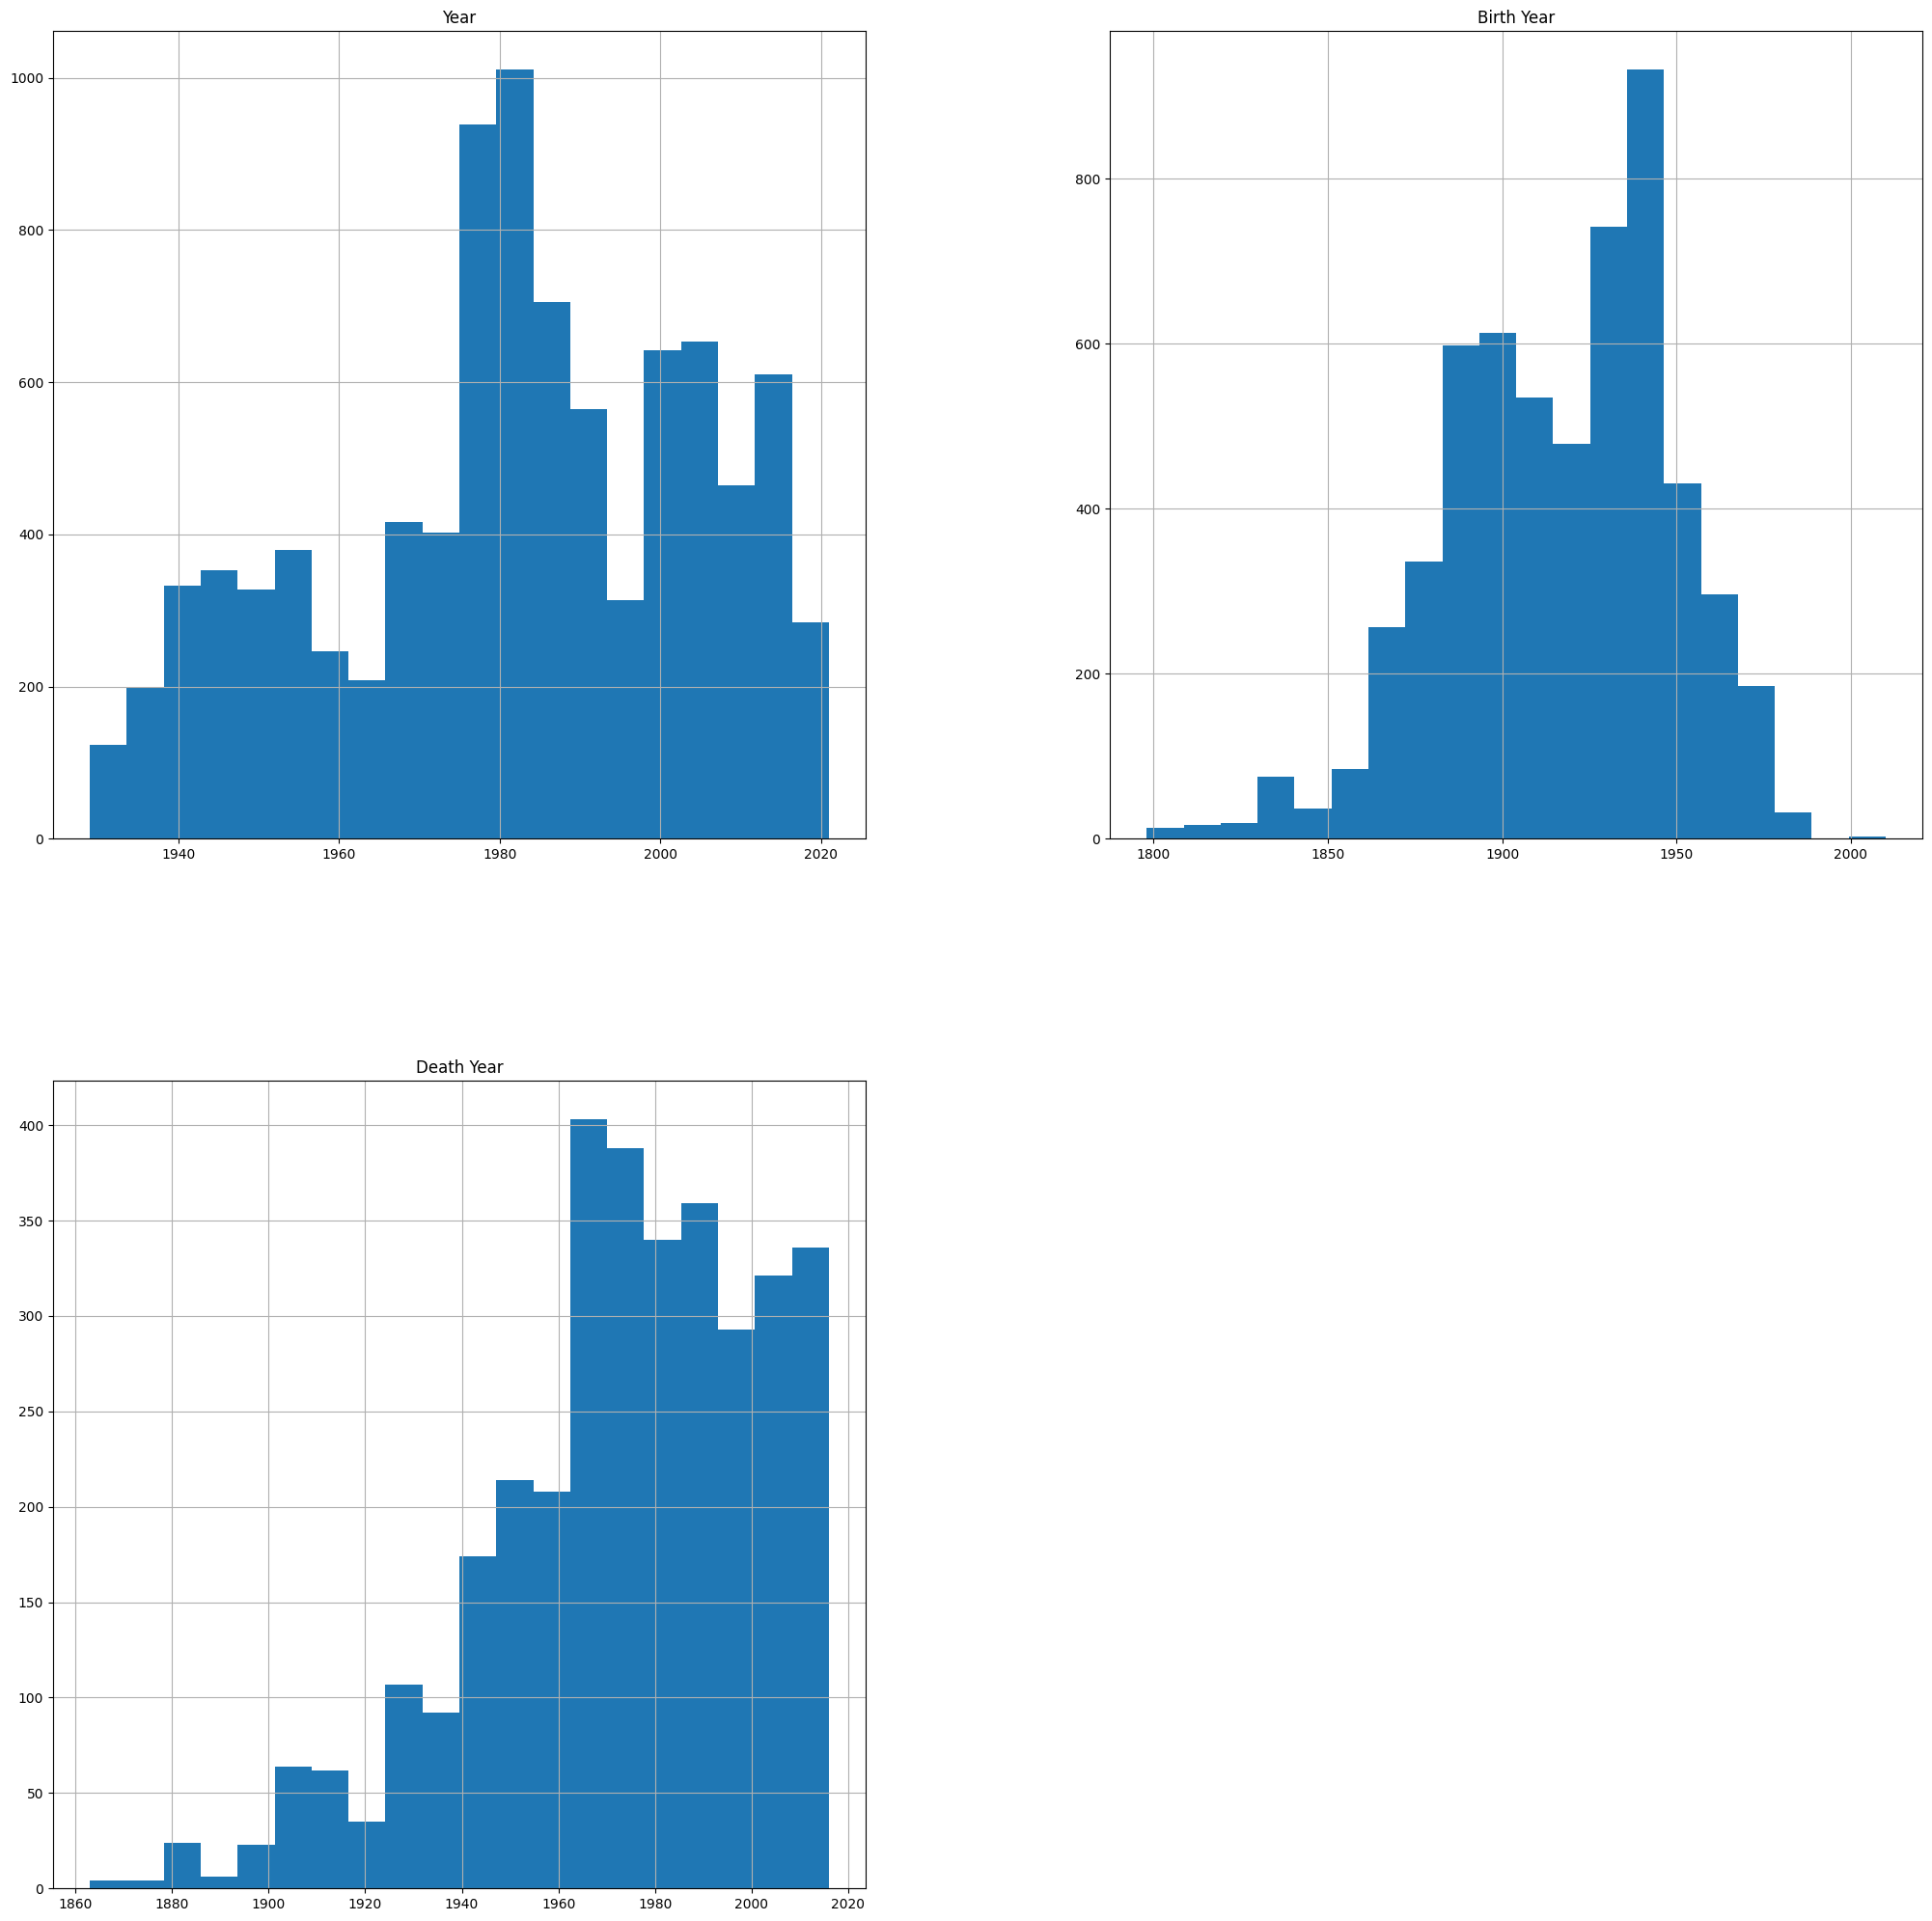

-----------------------------------------------------


In [183]:
eda_basico(df_moma_completo)

# NOTA
Durante la visualización en POWER BI nos hemos dado cuenta que los años no correspondían con la producción de las obras, así que hemos decidido recuperar la columna `Date` que había en el primer CSV grande del MoMA, que sí corresponde con las fechas. Al explorar esta columna, vemos que son de tipo string e incluyen valores que vamos a necesitar limpiar con un REGEX.

In [184]:
df_moma_completo['Date'].unique()

array(['1979', 'Unknown', '1945', '1931', '1987', '1996', '2004', '2003',
       '1990', '1997', '1991', '1973', '(1987)', '1992', '(1990)', '2012',
       '1967', '1867', '1867-70', '1860-70', '1998-2001', '1939', '1989',
       '2000', '1999', '(1997)', '1997-98', '(1985)', '1955-58', '1956',
       '1955', '1967-1968', '1998', '1933', '1968', '1980', '1940',
       '1947-48', '1995', '1962', '1958', '1952', '2007', '1900',
       'October 10, 1979', '1982', '(1986)', '1970', '1988', '2002',
       '1913', '1961', '(1996)', '1978', '1960', '1963', '1986', '1959',
       '(c. 1970).  (Reproduced drawings executed 1949-1969).', '1920',
       '1501-1600', 'c. 1917', '1932', '1953', '1946', '1974', '2006',
       '2005', 'c.1950', '1966', '1949', '1934', '1944', '2009',
       '(1988-89)', '1925', '1929', '(1972-73)', '1972', '1977', '(1981)',
       'c. 1940', '2005-07', '1969', '(1945)', '1965', '(1998)', '(1920)',
       '(1921)', '2001', '1951-52', '1895; signed 1896', '(2001)',
   

In [185]:
def extraer_ultimo_año(valor):
    # Buscar todos los años de 4 dígitos entre 1500 y 2099
    años = re.findall(r'\b(1[5-9]\d{2}|20\d{2})\b', str(valor))
    
    if años:
        return int(años[-1])  # Tomar el último año válido
    else:
        return 0000  # Valor nulo identificable

# Aplicar sobre la columna
df_moma_completo['Date'] = df_moma_completo['Date'].apply(extraer_ultimo_año)
df_moma_completo.sample(3)

Artist  Year  \
4245      Ernest Gusella  1982   
5391  Alsterfors, Sweden  1943   
6638      Pierre Bonnard  1945   

                                                  Title  Date  \
4245                                What Under the Sun?  1984   
5391                                       Finger Bowls  1946   
6638  Solfège, preliminary cover design for Petit So...  1893   

                                    Medium Acquisition Date  \
4245                  Video (color, sound)       1984-09-01   
5391                                 Glass       1947-06-17   
6638  Lithograph with watercolor additions       1990-01-16   

                      Department    Classification Nationality   Gender  \
4245   Media and Performance Art             Video    Canadian     Male   
5391       Architecture & Design            Design     Swedish  Unknown   
6638  Prints & Illustrated Books  Illustrated Book      French     Male   

      Birth Year  Death Year  
4245        1941        <NA>  
5391        <NA>        <NA>  
6638        1867        1947

In [186]:
df_moma_completo.sample(5)

Artist  Year  \
9680        Janet Bogardus  1994   
10402  Hans-Peter Feldmann  2007   
7024         Darrel Austin  1956   
3474            Carl Andre  1988   
2545         William Blake  2017   

                                                   Title  Date  \
9680                                             Unknown     0   
10402  Untitled from the Museum in Progress project I...  1998   
7024                                           Catamount  1940   
3474                25 plates from Untitled (Xerox Book)  1968   
2545                                             Unknown     0   

                           Medium Acquisition Date  \
9680                      Unknown          Unknown   
10402  Lithograph, offset printed          Unknown   
7024                Oil on canvas       1941-01-16   
3474           Offset lithographs       1969-02-10   
2545                      Unknown          Unknown   

                       Department    Classification Nationality   Gender  \
9680                      Unknown           Unknown     Unknown  Unknown   
10402  Prints & Illustrated Books  Illustrated Book      German     Male   
7024         Painting & Sculpture          Painting    American     Male   
3474   Prints & Illustrated Books  Illustrated Book    American     Male   
2545                      Unknown           Unknown     Unknown  Unknown   

       Birth Year  Death Year  
9680         <NA>        <NA>  
10402        1941        <NA>  
7024         1907        1994  
3474         1935        <NA>  
2545         <NA>        <NA>

In [187]:
df_moma_completo['Date'].unique()

array([1979,    0, 1945, 1931, 1987, 1996, 2004, 2003, 1990, 1997, 1991,
       1973, 1992, 2012, 1967, 1867, 1860, 2001, 1939, 1989, 2000, 1999,
       1985, 1955, 1956, 1968, 1998, 1933, 1980, 1940, 1947, 1995, 1962,
       1958, 1952, 2007, 1900, 1982, 1986, 1970, 1988, 2002, 1913, 1961,
       1978, 1960, 1963, 1959, 1969, 1920, 1600, 1917, 1932, 1953, 1946,
       1974, 2006, 2005, 1950, 1966, 1949, 1934, 1944, 2009, 1925, 1929,
       1972, 1977, 1981, 1965, 1921, 1951, 1896, 1916, 1994, 1975, 1889,
       1923, 1893, 1914, 1891, 1971, 1935, 1922, 1993, 1983, 1942, 1927,
       1924, 1957, 1919, 1936, 1954, 1908, 1928, 1912, 1872, 1943, 1938,
       1926, 1918, 1964, 1984, 1915, 1885, 1892, 1907, 1909, 2011, 1911,
       2008, 1897, 1905, 1976, 1941, 1895, 1902, 1937, 1898, 1930, 2010,
       2013, 1901, 2014, 1894, 2015, 2016, 1910, 1948, 1856, 1832, 1904,
       1863, 1828, 1861, 1842, 1852, 1880, 1854, 1874, 1906, 1844, 1868,
       1855, 1890, 1865, 1853, 1875, 1888])

In [188]:
df_moma_completo.to_csv('moma-clean.csv', index=False)